<a href="https://colab.research.google.com/github/Hassan-zeidan/AAI614_Zeidan/blob/main/Week%202/assignment%203/Experimenting_With_the_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

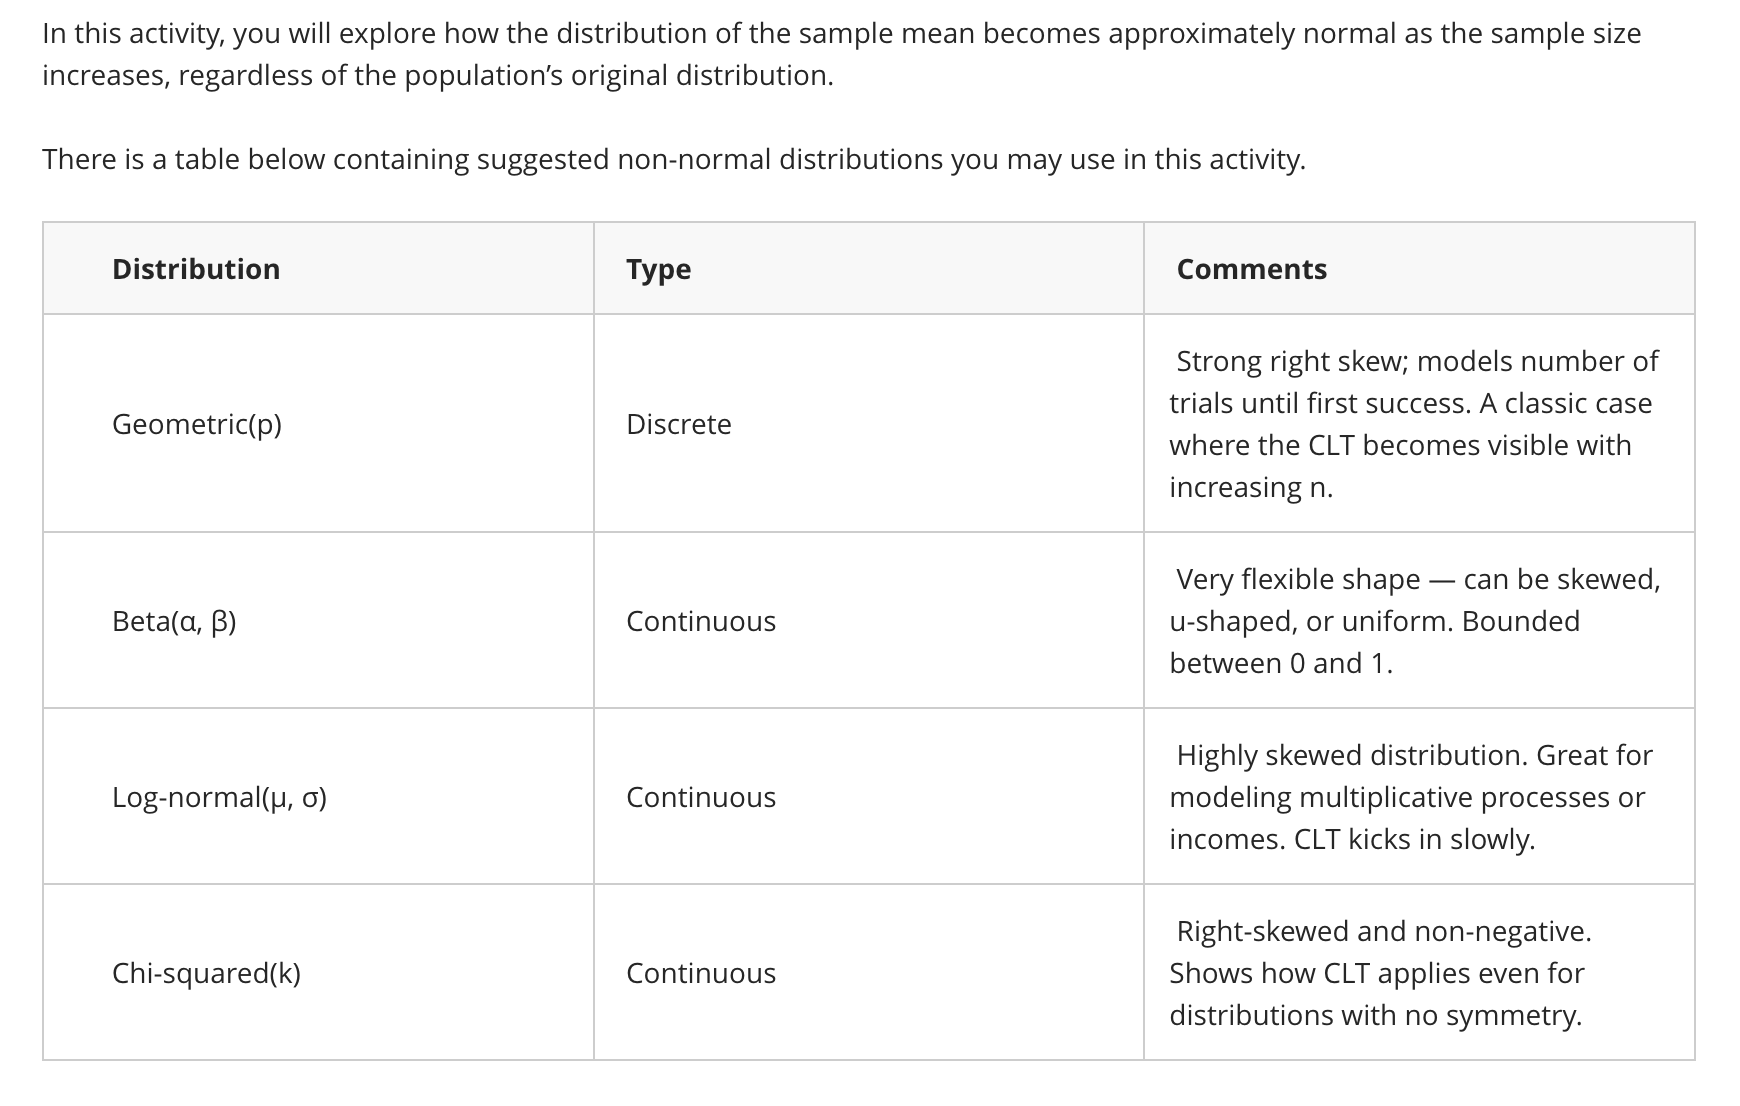

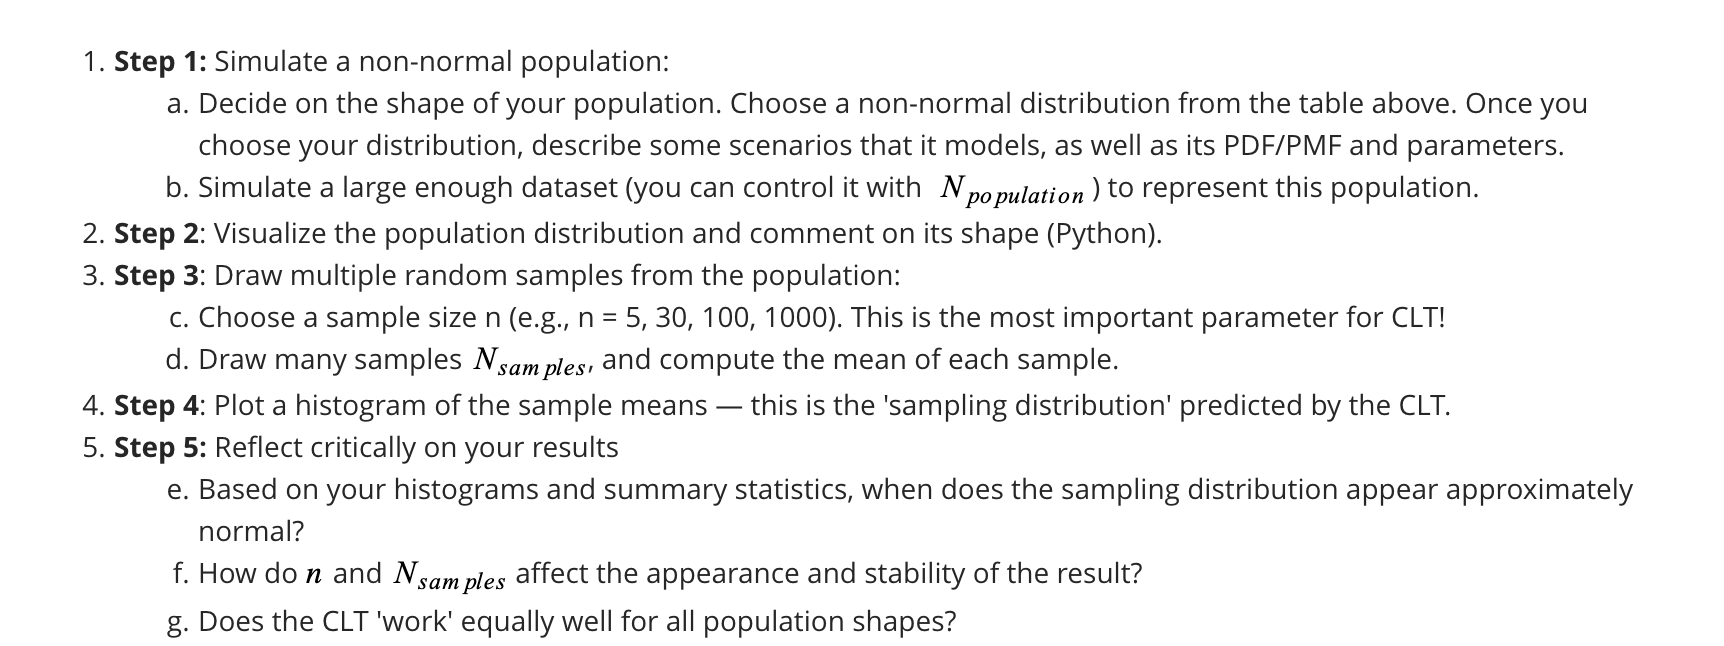

# **Step 1:**

---



a) i'll use a log-normal distribution. it's strongly right-skewed and only takes positive values. it can represent things like incomes or wait times where a few very large values pull the average up.
PDF (probability density function):  
the log-normal is continuous, so it has a PDF  
i'll set μ = 0 and σ = 1. with these, the theoretical population mean is exp(0.5) is around 1.6487 and the variance is (exp(1) − 1)·exp(1) is around 4.6708.

b)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mu=0
sigma = 1
N_population = 100000
pop = np.random.lognormal(mean=mu, sigma=sigma, size=N_population)

print("population size:", len(pop))
print("sample mean of population data:", pop.mean())
print("sample variance of population data:", pop.var())



population size: 100000
sample mean of population data: 1.6504022457562608
sample variance of population data: 4.600034367269779


# **Step 2:**

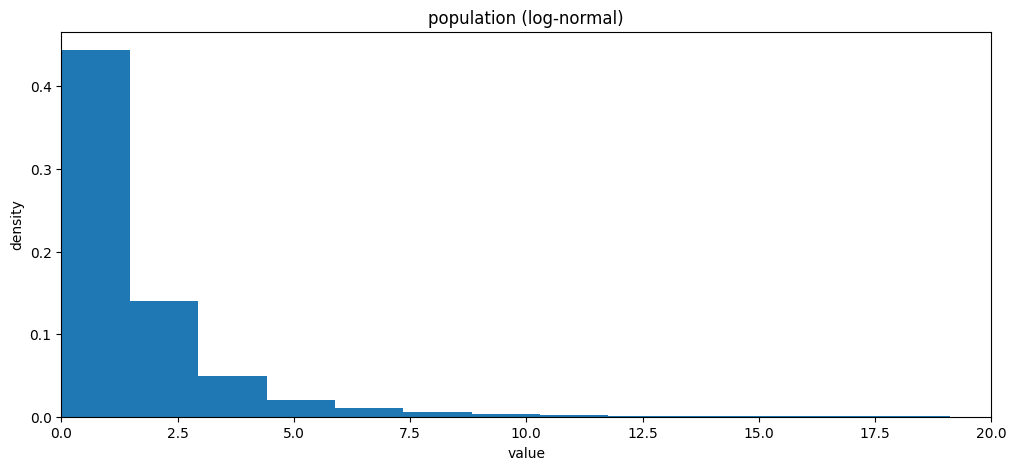

In [4]:
plt.figure(figsize=(12,5))
plt.xlim(0,20)
plt.hist(pop, bins=60, density=True)
plt.title("population (log-normal)")
plt.xlabel("value")
plt.ylabel("density")
plt.show()

# **Step 3:**

In [6]:
def sample_means(pop_array, n, N_samples=5000):
    means = []
    for i in range(N_samples):
        pick = np.random.choice(pop_array, size=n, replace=True)
        means.append(pick.mean())
    return np.array(means)

N_samples = 5000
means_n5 = sample_means(pop, n=5, N_samples=N_samples)
means_n30 = sample_means(pop, n=30,N_samples=N_samples)
means_n100 = sample_means(pop, n=100,N_samples=N_samples)

for arr, n in [(means_n5,5),(means_n30,30),(means_n100,100)]:
    print(f"n={n}  mean of means={arr.mean():.2f}  std of means={arr.std():.2f}")

n=5  mean of means=1.66  std of means=0.95
n=30  mean of means=1.65  std of means=0.39
n=100  mean of means=1.65  std of means=0.21


# **Step 4:**

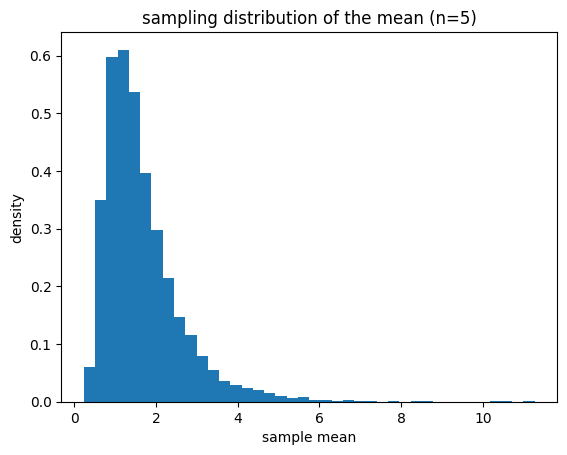

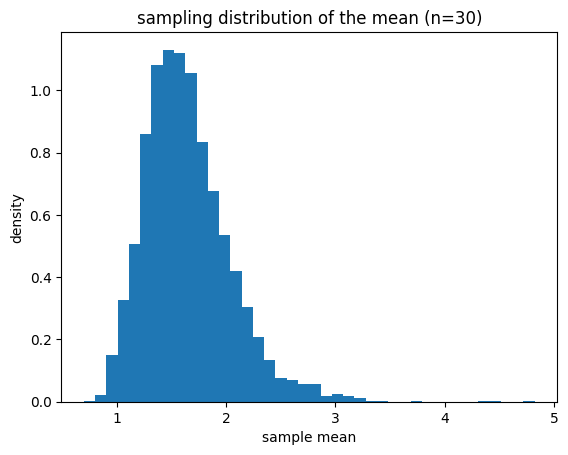

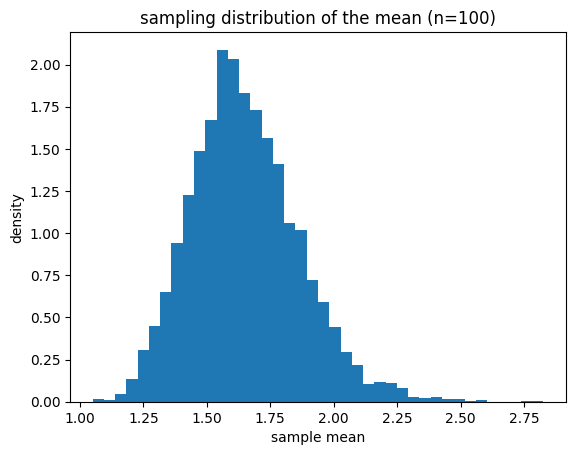

In [8]:
def show_hist(x, title):
    plt.hist(x, bins=40, density=True)
    plt.title(title)
    plt.xlabel("sample mean")
    plt.ylabel("density")
    plt.show()

show_hist(means_n5,   "sampling distribution of the mean (n=5)")
show_hist(means_n30,  "sampling distribution of the mean (n=30)")
show_hist(means_n100, "sampling distribution of the mean (n=100)")

# **Step 5:**

e) when does the sampling distribution look approximately normal?
for n = 5, the histogram of sample means is still a bit skewed. by n = 30 it already looks much smoother and close to bell-shaped. at n = 100 it's basically normal . the average of the sample means is close to the true population mean in all cases, and the spread gets smaller as n grows.

f) how do n and N_samples affect the result?
n controls the shape and width. larger n makes the sampling distribution more normal and tighter (smaller spread) because the standard error is about sqrt(Var/n). N_samples just gives you more points in the histogram. it doesn’t change the true shape.

g) does the CLT work equally well for all shapes?
it works, but the starting population shape changes how fast it looks normal. for a very skewed distribution like log-normal, you need a bigger n to get a clean bell shape. for something mild (like uniform), a smaller n can already look normal.